# Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import seaborn as sns
import ydata_profiling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [3]:
train=pd.read_csv('KDDTrain+.txt',sep=',')
test=pd.read_csv('KDDTest+.txt',sep=',')

In [4]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [6]:
len(columns)

43

In [7]:
train.columns=columns
test.columns=columns

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [9]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [10]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


# Features
### 1. duration = length (number of seconds) of the connection.
### 2. protocol_type = type of the protocol, e.g. tcp, udp, etc.
### 3. service = network service on the destination, e.g., http, telnet, etc.
### 4. flag = normal or error status of the connection.
### 5. src_bytes = number of data bytes from source to destination.
### 6. dst_bytes = number of data bytes from destination to source.
### 7. land = 1 if connection is from/to the same host/port; 0 otherwise.
### 8. wrong_fragment = number of “wrong” fragments.
### 9. urgent = number of urgent packets.
### 10. hot = number of “hot” indicators.
### 11. num_failed_logins = number of failed login attempts.
### 12. logged_in   = 1 if successfully logged in; 0 otherwise.
### 13. num_compromised = number of “compromised” conditions.
### 14. root_shell = 1 if root shell is obtained; 0 otherwise.
### 15. su_attempted = 1 if “su root” command attempted; 0 otherwise.
### 16. num_root  = number of “root” accesses.
### 17. num_file_creations = number of file creation operations.
### 18. num_shells  = number of shell prompts.
### 19. num_access_files = number of operations on access control files.
### 20. num_outbound_cmds  = number of outbound commands in an ftp session.
### 21. is_host_login  = 1 if the login belongs to the “hot” list; 0 otherwise.
### 22. is_guest_login = 1 if the login is a “guest”login; 0 otherwise.
### 23. count  = number of connections to the same host as the current connection in the past two seconds.
### 24. srv_count  = number of connections to the same service as the current connection in the past two seconds.
### 25. serror_rate  = % of connections that have “SYN” errors.
### 26. srv_serror_rate = % of connections that have “SYN” errors.
### 27. rerror_rate  = % of connections that have “REJ” errors.
### 28. srv_rerror_rate   = % of connections that have “REJ” errors.
### 29. same_srv_rate  = % of connections to the same service.
### 30. diff_srv_rate  = % of connections to different services.
### 31. srv_diff_host_rate  = % of connections to different hosts.
### 32. dst_host_count  = Number of connections to the same destination host.
### 33. dst_host_srv_count  = Number of connections to the same service on the destination host.
### 34. dst_host_same_srv_rate = % of connections to the same service on the destination host.
### 35. dst_host_diff_srv_rate =   % of connections to different services on the destination host.      
### 36. dst_host_same_src_port_rate = % of connections to the same port on the destination host. 
### 37. dst_host_srv_diff_host_rate = % of connections to the same service on different destination hosts.
### 38. dst_host_serror_rate = % of connections that have SYN errors to the destination host.       
### 39. dst_host_srv_serror_rate = % of connections that have SYN errors to the same service on the destination host.
### 40. dst_host_rerror_rate  =  % of connections that have REJ errors to the destination host.     
### 41. dst_host_srv_rerror_rate = % of connections that have REJ errors to the same service on the destination host.
### 42. last_flag = count of normal or error status of the connection.
### 43. attack  = label or target variable that indicates whether a given network connection is normal or belongs to a specific type of attack.         
      


## In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [13]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [14]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [15]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [16]:
train.shape

(125972, 44)

In [17]:
train['attack_class'].value_counts()

attack_class
0.0    67342
1.0    45927
2.0    11656
3.0      995
4.0       52
Name: count, dtype: int64

# Basic Exploratory Analysis

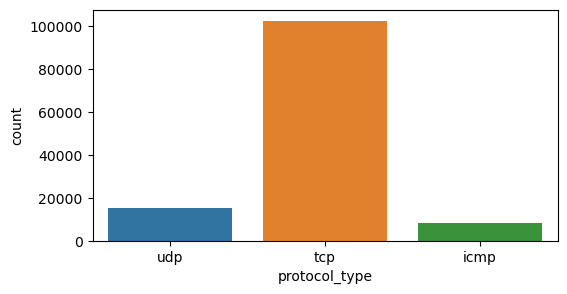

In [18]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

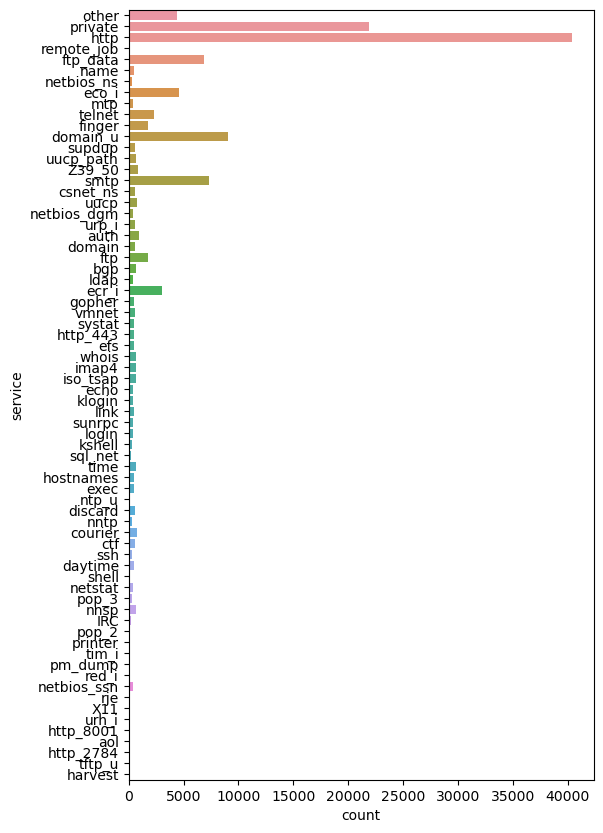

In [22]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

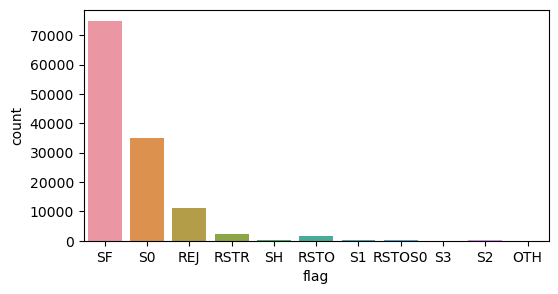

In [23]:
#flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()



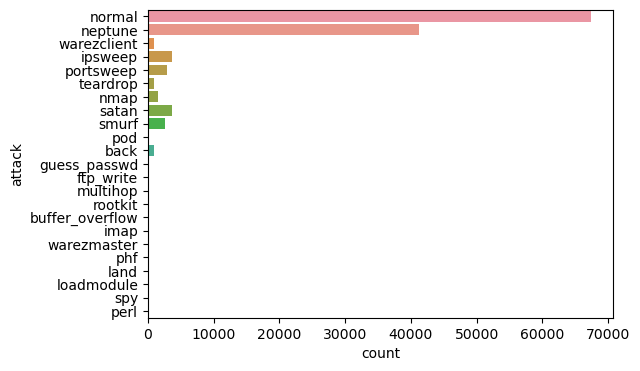

In [24]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

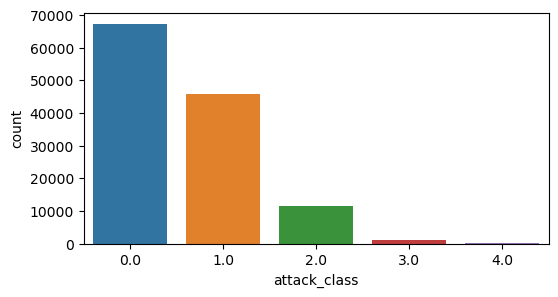

In [25]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

## identifying relationships (between Y & numerical independent variables by comparing means)

##### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

In [26]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]


In [27]:
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [28]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [29]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [30]:
train_num['attack_class'] = train['attack_class']

C:\Users\hp\AppData\Local\Temp\ipykernel_3916\1756135842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num['attack_class'] = train['attack_class']


In [31]:
train_num['attack_class'].value_counts()

attack_class
0.0    67342
1.0    45927
2.0    11656
3.0      995
4.0       52
Name: count, dtype: int64

In [32]:
test_num['attack_class'].value_counts()

attack_class
0.0    9711
1.0    7459
3.0    2885
2.0    2421
4.0      67
Name: count, dtype: int64

In [33]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


# Data Audit Report

In [34]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [35]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [36]:
num_summary.to_csv('num_summary.csv')

In [37]:
df_dos=train[train['attack_class']==1]
df_dos.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19,1.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21,1.0
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21,1.0
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21,1.0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21,1.0


In [38]:
df_final=df_dos.select_dtypes(exclude=[object])

In [39]:
df_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,19,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,21,1.0
5,0,0,0,0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,21,1.0
6,0,0,0,0,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,21,1.0
7,0,0,0,0,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,21,1.0


<Axes: >

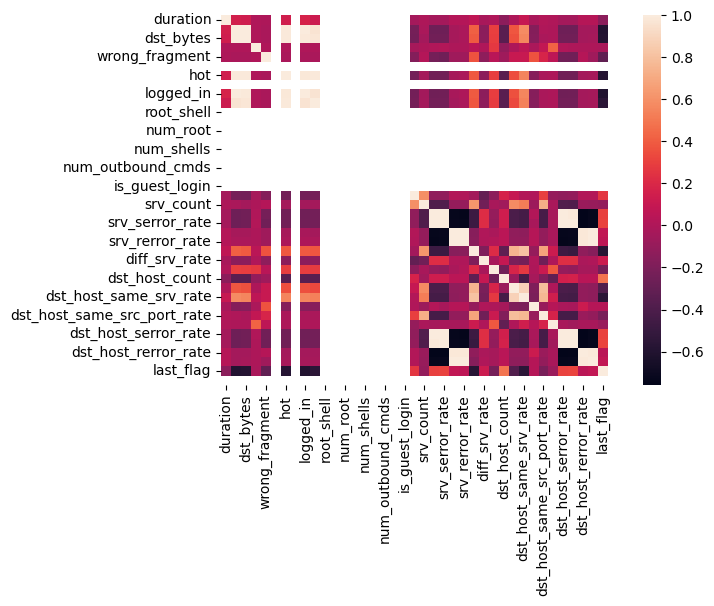

In [40]:
corr=df_final.corr()
sns.heatmap(corr)

In [41]:
df_probe=train[train['attack_class']==2]
df_probe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
16,0,icmp,eco_i,SF,18,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.0,0.00,0.0,ipsweep,18,2.0
29,0,icmp,eco_i,SF,8,0,0,0,0,0,...,0.00,1.00,0.51,0.00,0.0,0.00,0.0,ipsweep,17,2.0
32,0,tcp,private,REJ,0,0,0,0,0,0,...,0.31,0.28,0.00,0.00,0.0,0.29,1.0,portsweep,20,2.0
55,0,icmp,eco_i,SF,8,0,0,0,0,0,...,0.00,1.00,0.26,0.00,0.0,0.00,0.0,nmap,17,2.0
61,0,tcp,private,REJ,0,0,0,0,0,0,...,0.84,0.00,0.00,0.07,0.0,0.62,1.0,satan,18,2.0


In [42]:
df_final1=df_probe.select_dtypes(exclude=[object])

In [43]:
df_final1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
16,0,18,0,0,0,0,0,0,0,0,...,1.0,0.00,1.00,1.00,0.00,0.0,0.00,0.0,18,2.0
29,0,8,0,0,0,0,0,0,0,0,...,1.0,0.00,1.00,0.51,0.00,0.0,0.00,0.0,17,2.0
32,0,0,0,0,0,0,0,0,0,0,...,0.0,0.31,0.28,0.00,0.00,0.0,0.29,1.0,20,2.0
55,0,8,0,0,0,0,0,0,0,0,...,1.0,0.00,1.00,0.26,0.00,0.0,0.00,0.0,17,2.0
61,0,0,0,0,0,0,0,0,0,0,...,0.0,0.84,0.00,0.00,0.07,0.0,0.62,1.0,18,2.0


<Axes: >

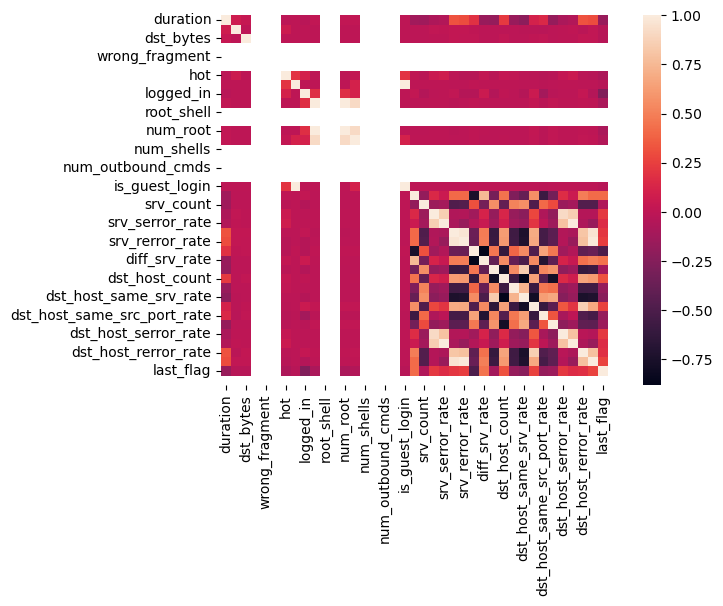

In [44]:
corr=df_final1.corr()
sns.heatmap(corr)

In [45]:
df_r2l=train[train['attack_class']==3]
df_r2l.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
12,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.00,1.0,0.20,0.0,0.0,0.0,0.0,warezclient,15,3.0
47,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.00,1.0,0.18,0.0,0.0,0.0,0.0,warezclient,12,3.0
147,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.00,1.0,0.19,0.0,0.0,0.0,0.0,warezclient,11,3.0
189,15159,tcp,ftp,SF,350,1185,0,0,0,6,...,0.02,0.0,0.00,0.0,0.0,0.0,0.0,warezclient,2,3.0
221,4,tcp,ftp_data,SF,832,0,0,0,0,0,...,0.00,1.0,0.18,0.0,0.0,0.0,0.0,warezclient,12,3.0


In [46]:
df_final2=df_r2l.select_dtypes(exclude=[object])

In [47]:
df_final2.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
12,0,334,0,0,0,0,0,0,1,0,...,1.00,0.00,1.0,0.20,0.0,0.0,0.0,0.0,15,3.0
47,0,334,0,0,0,0,0,0,1,0,...,1.00,0.00,1.0,0.18,0.0,0.0,0.0,0.0,12,3.0
147,0,334,0,0,0,0,0,0,1,0,...,1.00,0.00,1.0,0.19,0.0,0.0,0.0,0.0,11,3.0
189,15159,350,1185,0,0,0,6,0,1,0,...,0.56,0.02,0.0,0.00,0.0,0.0,0.0,0.0,2,3.0
221,4,832,0,0,0,0,0,0,1,0,...,1.00,0.00,1.0,0.18,0.0,0.0,0.0,0.0,12,3.0


<Axes: >

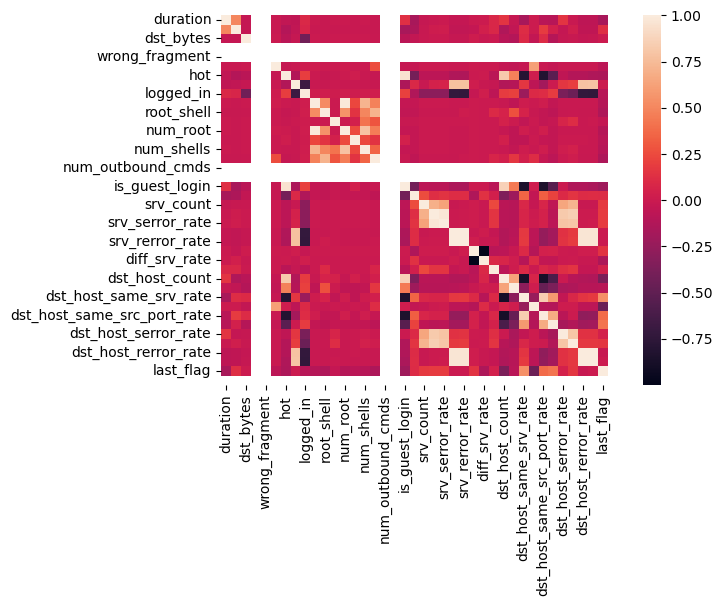

In [48]:
corr=df_final2.corr()
sns.heatmap(corr)

In [49]:
df_u2r=train[train['attack_class']==4]
df_u2r.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
3172,98,tcp,telnet,SF,621,8356,0,0,1,1,...,0.02,0.0,0.00,0.0,0.0,0.0,0.0,rootkit,1,4.0
5578,0,tcp,ftp_data,SF,0,5696,0,0,0,0,...,0.00,1.0,0.02,0.0,0.0,0.0,0.0,buffer_overflow,9,4.0
5830,0,tcp,ftp_data,SF,0,5828,0,0,0,0,...,0.00,1.0,0.00,0.0,0.0,0.0,0.0,buffer_overflow,12,4.0
8674,179,tcp,telnet,SF,1559,2855,0,0,0,3,...,0.00,0.5,0.00,0.0,0.0,0.0,0.0,buffer_overflow,2,4.0
11447,708,tcp,telnet,SF,1727,24080,0,0,0,0,...,0.02,0.0,0.00,0.0,0.0,0.0,0.0,rootkit,0,4.0


In [50]:
df_final3=df_u2r.select_dtypes(exclude=[object])

In [51]:
df_final3.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
3172,98,621,8356,0,0,1,1,0,1,5,...,0.02,0.02,0.0,0.00,0.0,0.0,0.0,0.0,1,4.0
5578,0,0,5696,0,0,0,0,0,1,0,...,1.00,0.00,1.0,0.02,0.0,0.0,0.0,0.0,9,4.0
5830,0,0,5828,0,0,0,0,0,1,0,...,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,12,4.0
8674,179,1559,2855,0,0,0,3,0,1,4,...,1.00,0.00,0.5,0.00,0.0,0.0,0.0,0.0,2,4.0
11447,708,1727,24080,0,0,0,0,0,1,6,...,0.01,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0,4.0


<Axes: >

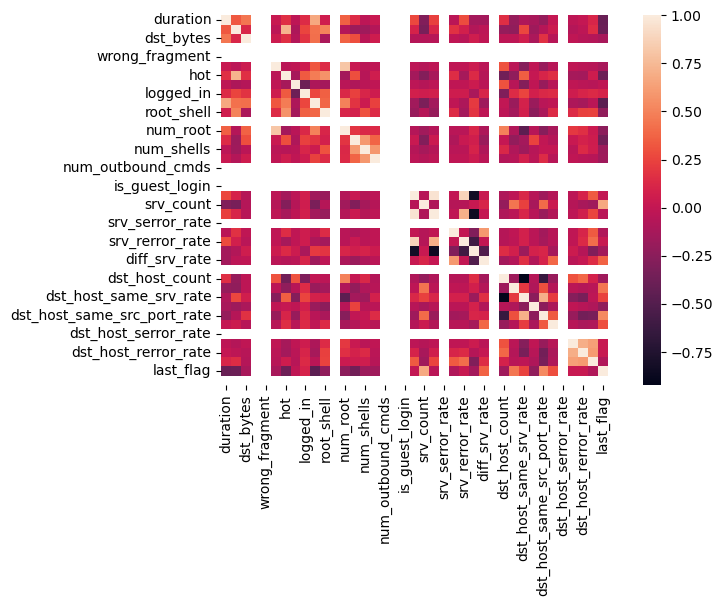

In [52]:
corr=df_final3.corr()
sns.heatmap(corr)

### Handling Outlier

In [53]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

#### No missing in train dataset . So , Missing treatment not required .

In [54]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [55]:
cat_summary

,protocol_type,service,flag,attack
N,125972,125972,125972,125972
NMISS,0,0,0,0
ColumnsNames,protocol_type tcp 102688 udp 14993 ic...,service http 40338 private 21853 ...,flag SF 74944 S0 34851 REJ ...,attack normal 67342 neptune ...


### Dummy Variable Creation


In [56]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [57]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Final file for analysis

In [58]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [59]:
train_new['attack_class'] = train['attack_class']

In [60]:
train_new['attack_class'].value_counts()

attack_class
0.0    67342
1.0    45927
2.0    11656
3.0      995
4.0       52
Name: count, dtype: int64

In [61]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064538,0.062081,...,-0.000757,-0.005534,0.408874,-0.000414,-0.023837,-0.020279,0.000605,-0.011691,0.037013,-0.001571
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.000898,0.002845,-0.022114,-0.001067,-0.028784,-0.002928,-0.000555,-0.013779,0.047995,-0.002012
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.421999,0.237363,...,0.010050,-0.014104,-0.053377,0.006873,-0.060374,-0.051676,-0.000156,-0.029791,-0.011541,0.064962
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.020279,-0.002928,-0.051676,NaN,NaN,NaN,-0.020616,NaN,-0.118539,-0.014876,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000605,-0.000555,-0.000156,NaN,NaN,NaN,-0.000561,NaN,0.000850,-0.000405,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.011691,-0.013779,-0.029791,NaN,NaN,NaN,-0.011886,NaN,-0.068341,-0.008576,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.037013,0.047995,-0.011541,NaN,NaN,NaN,0.270177,NaN,0.104233,-0.008567,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


<Axes: >

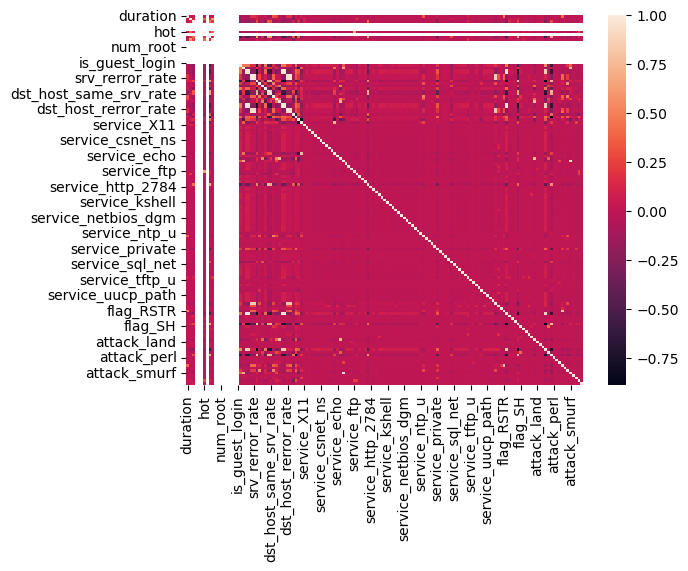

In [62]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

### Dropping columns based on data audit report
    - Based on low variance (near zero variance)
    - High missings (>25% missings)
    - High correlations between two numerical variables


In [63]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

<Axes: >

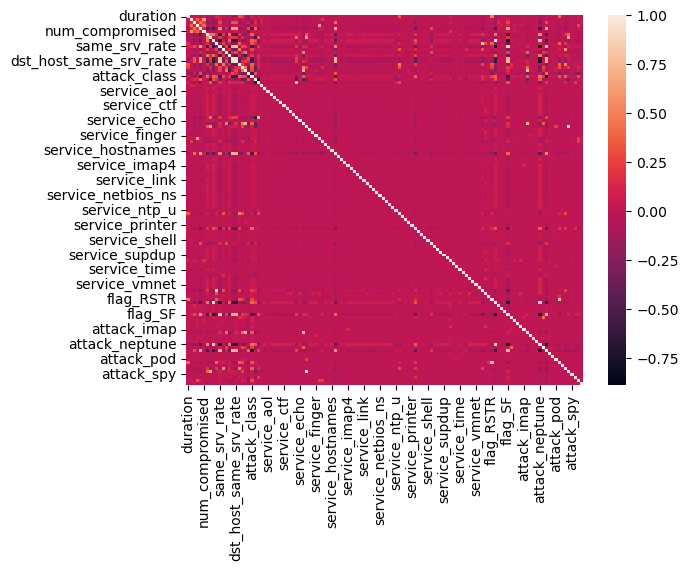

In [64]:
sns.heatmap(train_new.corr())

#### Variable reduction using Select K-Best technique

In [65]:
X = train_new[train_new.columns.difference(['attack_class'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [66]:
X_new.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [67]:
X_new.scores_

array([4.29255689e+04, 2.53236149e+02, 1.75783389e+03, 3.49261289e+02,
       1.27655130e+04, 7.84569917e+00, 6.58857569e+03, 2.21357357e+02,
       1.74986404e+05, 4.19824397e+03,            inf, 1.92727044e+03,
       1.26107003e+02, 8.79609325e+01, 9.60019762e+03, 7.49494060e+03,
       1.29407187e+04, 1.22334664e+03, 6.29265053e+01, 3.96343433e+02,
       2.64821703e+05, 6.40882254e+02, 2.14280685e+04, 4.56921125e+03,
       2.93396808e+03, 9.43281721e+03, 1.31025095e+04, 1.37785525e+04,
       3.41058705e+04, 3.46257821e+04, 9.46227107e+03, 1.22813491e+03,
       1.66050532e+03, 3.34946711e+02, 2.54784053e+02, 5.65935162e+03,
       5.51308797e+04, 7.62272958e+01, 2.08990591e+01, 1.29551542e+01,
       5.68123276e+04, 6.48704199e+02, 2.83939025e+03, 1.92670564e+04,
       3.19608083e+04, 4.03273235e+02, 3.07926970e+03, 1.93983363e+03,
       4.48735799e+03, 6.80183252e+04, 5.14255830e+04, 1.18510234e+01,
       3.67695514e+02, 4.90438745e+00, 1.45872774e+02, 2.99329576e+02,
      

In [68]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['attack_buffer_overflow', 'attack_neptune', 'attack_normal',
       'attack_warezclient', 'count', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

### Final list of variable selected for the model building using Select KBest

 #### attack_neptune, attack_normal, attack_satan, count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_same_srv_rate, dst_host_srv_count, flag_S0, flag_SF, last_flag, logged_in, same_srv_rate, serror_rate, service_http

# Model Building

In [69]:
top_features=['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http']
      
X_train = train_new[top_features]
y_train = train_new['attack_class']
X_test = test_new[top_features]
y_test = test_new['attack_class']


## Applying SMOTE to handle imbalanced class

In [70]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Checking initial class distribution in the training set
print("Original class distribution:", Counter(y_train))

# Define SMOTE and RandomOverSampler with custom sampling strategies
smote = SMOTE(sampling_strategy={1.0: 67342, 2.0: 67342, 3.0: 67342}, random_state=42)
ros = RandomOverSampler(sampling_strategy={4.0: 67342}, random_state=42)

# Combine SMOTE and RandomOverSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('ros', ros)])
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Checking the resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({0.0: 67342, 1.0: 45927, 2.0: 11656, 3.0: 995, 4.0: 52})
Resampled class distribution: Counter({0.0: 67342, 1.0: 67342, 3.0: 67342, 2.0: 67342, 4.0: 67342})


In [71]:
print(X_resampled.shape)
print(y_resampled.shape)

(336710, 15)
(336710,)


In [72]:
y_resampled.value_counts()

attack_class
0.0    67342
1.0    67342
3.0    67342
2.0    67342
4.0    67342
Name: count, dtype: int64

In [73]:
y_train.value_counts()

attack_class
0.0    67342
1.0    45927
2.0    11656
3.0      995
4.0       52
Name: count, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,GridSearchCV


# 1. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [75]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

In [76]:
lr_clf.fit(X_resampled , y_resampled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [77]:
y_pred=lr_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 0., 0., 1.])

In [78]:
accuracy_score( y_test, y_pred )

0.7554895089384731

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.79
Recall: 0.76
F1 Score: 0.75


## Logistic Regression using SGDC

In [81]:
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_resampled , y_resampled)

SGDClassifier()

In [82]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 3., 0., 3.])

In [83]:
accuracy_score( y_test, y_pred )

0.747282970323382

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic

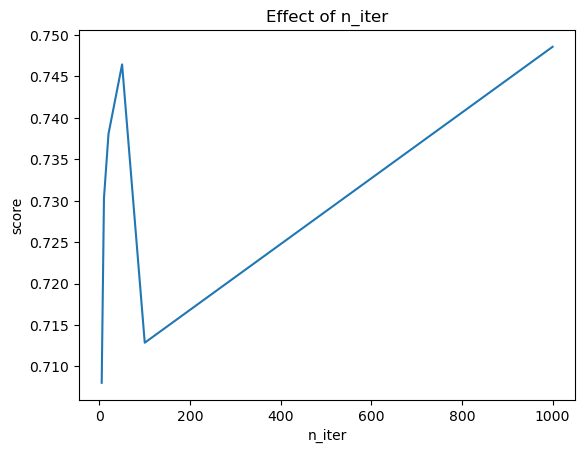

In [84]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_resampled , y_resampled)
    scores.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [85]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.81
Recall: 0.75
F1 Score: 0.78


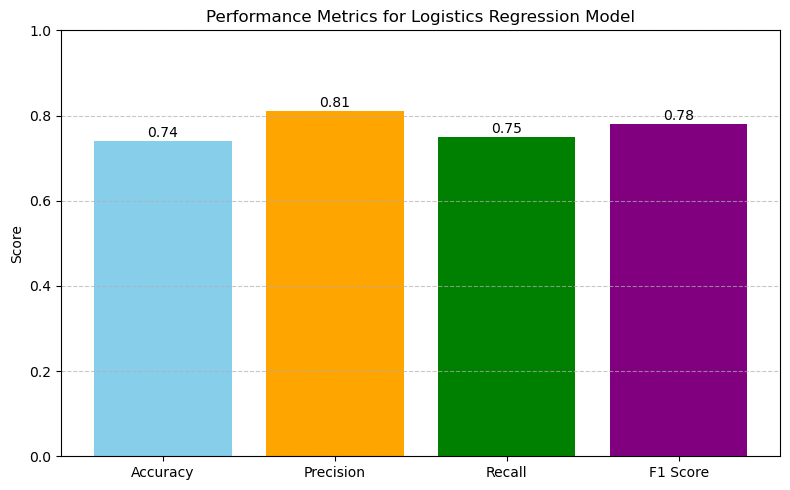

In [86]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.74, 0.81, 0.75, 0.78]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics for Logistics Regression Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# 2. Support Vector Machine

## Svc

In [87]:
model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [ ]:
model.fit(X_resampled , y_resampled)

In [97]:
y_pred=model.predict(X_test) 
y_pred

array([1., 0., 2., ..., 2., 0., 2.])

In [98]:
accuracy_score(y_test,y_pred)

0.7501663487557113

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.80
Recall: 0.75
F1 Score: 0.76


## linear svc

In [85]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_resampled, y_resampled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [86]:
y_pred=svm_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 2., 0., 2.])

In [87]:
accuracy_score( y_test, y_pred )

0.7708823138002928

In [88]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.85
Recall: 0.77
F1 Score: 0.79


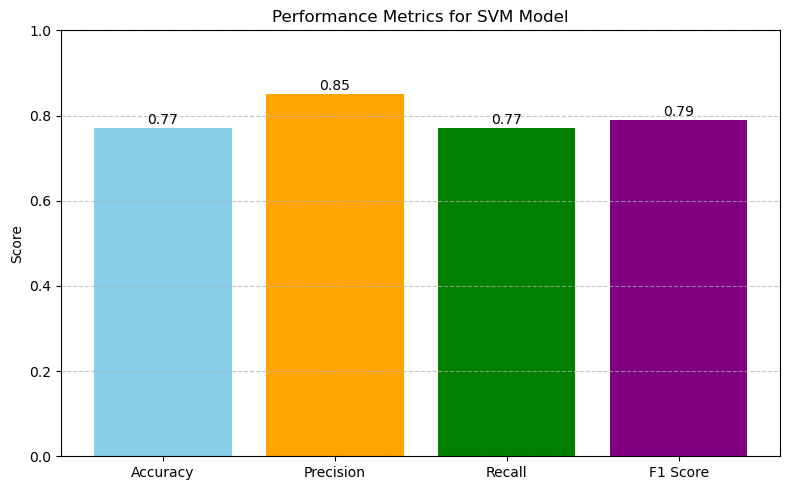

In [5]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.77, 0.85, 0.77, 0.79]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics for SVM Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# 3. Decision Tree

In [76]:
clf_tree = DecisionTreeClassifier( max_depth = 1000,criterion='entropy' ,max_features = 0.9)
clf_tree.fit( X_resampled , y_resampled )

DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features=0.9)

In [77]:
y_pred = clf_tree.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [78]:
accuracy_score(y_test, y_pred)

0.8448742403406823

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.84
Recall: 0.84
F1 Score: 0.84


## Fine tuning the parameter


In [81]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [82]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_resampled , y_resampled )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [83]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=8)

In [84]:
tree.best_params_

{'max_depth': 8, 'max_features': 8}

## Building final decision tree model 

In [85]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=8)
clf_tree.fit( X_resampled , y_resampled )

DecisionTreeClassifier(max_depth=8, max_features=8)

## Feature relative importance

In [86]:
clf_tree.feature_importances_

array([4.84662024e-02, 9.62498951e-02, 8.85557009e-03, 2.23917528e-02,
       6.27938148e-03, 1.00384943e-02, 3.33863551e-02, 1.60664619e-01,
       1.69916634e-01, 9.11188437e-04, 3.76291592e-01, 2.88790858e-02,
       3.31735244e-02, 2.35902520e-05, 4.47211509e-03])

In [87]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_resampled.columns, clf_tree.feature_importances_)]

feature_map

[('attack_neptune', 0.048466202443452414),
 ('attack_normal', 0.09624989511751147),
 ('attack_satan', 0.008855570089752265),
 ('count', 0.022391752833944973),
 ('dst_host_diff_srv_rate', 0.006279381476591773),
 ('dst_host_same_src_port_rate', 0.010038494276853254),
 ('dst_host_same_srv_rate', 0.03338635506324917),
 ('dst_host_srv_count', 0.16066461860520442),
 ('flag_S0', 0.16991663419849698),
 ('flag_SF', 0.0009111884367817504),
 ('last_flag', 0.3762915919270278),
 ('logged_in', 0.02887908582585394),
 ('same_srv_rate', 0.03317352436742054),
 ('serror_rate', 2.3590251987483017e-05),
 ('service_http', 0.004472115085871598)]

In [88]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
10,last_flag,0.376292
8,flag_S0,0.169917
7,dst_host_srv_count,0.160665
1,attack_normal,0.096250
0,attack_neptune,0.048466
6,dst_host_same_srv_rate,0.033386
12,same_srv_rate,0.033174
11,logged_in,0.028879
3,count,0.022392
5,dst_host_same_src_port_rate,0.010038


In [89]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [90]:
tree_test_pred.sample( n = 10 )

,actual,predicted
19701,0.0,0.0
7457,1.0,1.0
15113,0.0,0.0
5330,3.0,3.0
13233,3.0,3.0
14593,2.0,2.0
13720,3.0,3.0
11072,0.0,0.0
4774,1.0,1.0
7170,2.0,2.0


In [91]:
accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8603114048706916

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision_score(tree_test_pred.actual, tree_test_pred.predicted, average='weighted') 

0.8927006153006286

In [95]:
recall_score(tree_test_pred.actual, tree_test_pred.predicted, average='weighted')


0.8603114048706916

In [96]:

f1_score(tree_test_pred.actual, tree_test_pred.predicted, average='weighted')

0.8677093742483611

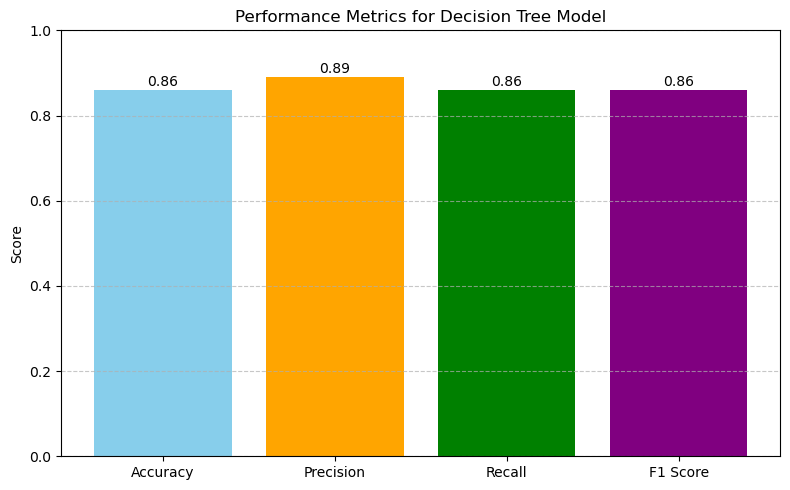

In [97]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.86, 0.89, 0.86, 0.86]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics for Decision Tree Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### After fine-tuning the accuracy of decision tree is increased ie.86%

# 4. Naive bayes

In [115]:
from sklearn.naive_bayes import BernoulliNB


In [116]:
bnb_clf = BernoulliNB()
bnb_clf.fit(X_resampled , y_resampled)

BernoulliNB()

In [117]:
y_pred=bnb_clf.predict(X_test)
y_pred

array([1., 0., 4., ..., 3., 0., 2.])

In [119]:
accuracy_score( y_test, y_pred )

0.8068136450339352

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.87
Recall: 0.81
F1 Score: 0.83


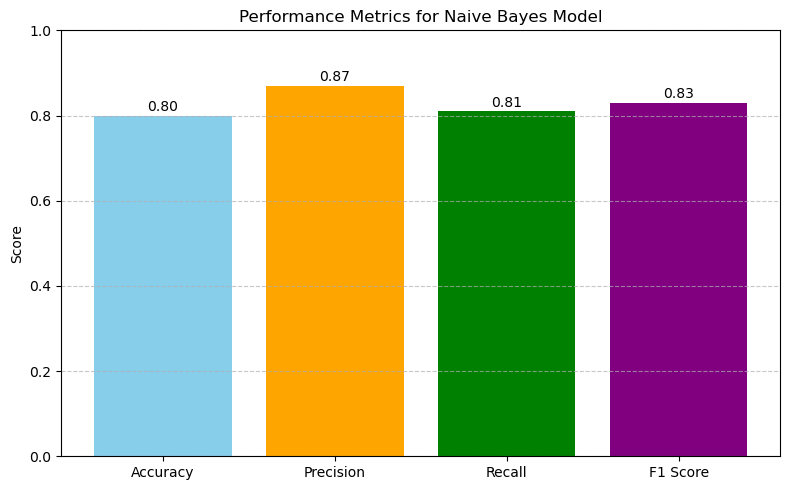

In [98]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.80, 0.87, 0.81, 0.83]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# 5. K-Nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(X_resampled , y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [123]:
y_pred=k_neigh.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [124]:
accuracy_score(y_test, y_pred)

0.7985627467506543

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.80
Recall: 0.80
F1 Score: 0.79


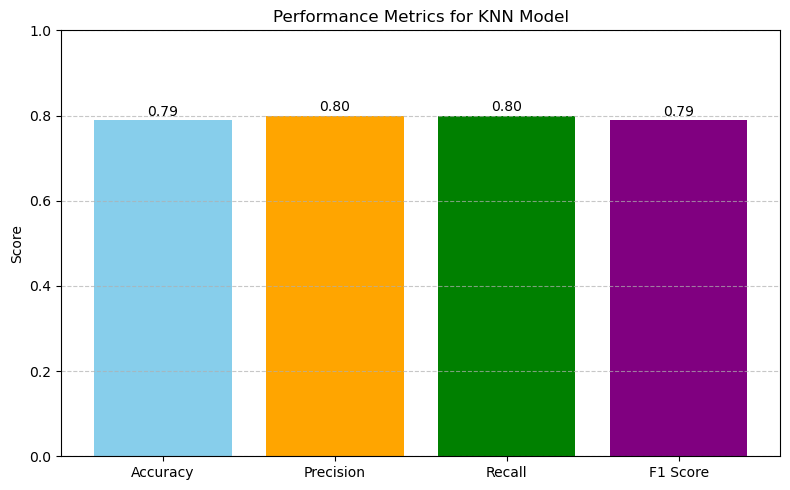

In [99]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.79, 0.80, 0.80, 0.79]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics for KNN Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# 6. Random forest

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score
# Set seed for reproducibility
seed = 42

# Define model parameters
num_trees = 100
max_features = 3

# Create K-Fold cross-validator
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)

# Train the model on the full training set
model.fit(X_resampled , y_resampled)

# Predict on the test set to find testing accuracy
y_test_pred = model.predict(X_test)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f" Accuracy: {testing_accuracy:.2f}")

precision = precision_score(y_test_pred, y_test, average='weighted') 
recall = recall_score(y_test_pred, y_test, average='weighted')
f1 = f1_score(y_test_pred, y_test, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


 Accuracy: 0.89
Precision: 0.91
Recall: 0.89
F1 Score: 0.90


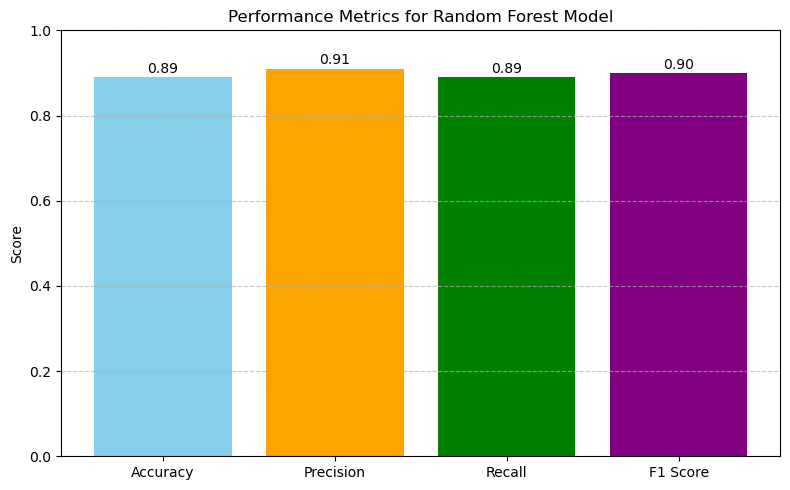

In [100]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.89, 0.91, 0.89, 0.90]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics for Random Forest Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Accuracy (0.89): Indicates that the model is correct 89% of the time, which is strong, especially if the dataset is balanced.
### Precision (0.91): Shows that 91% of the time, when the model predicts a positive result, it’s correct. High precision is valuable in contexts where false positives are costly.
### Recall (0.89): Demonstrates that the model correctly identifies 89% of the actual positives, which is essential when it’s important not to miss any positive cases.
### F1 Score (0.90): This combines both precision and recall, indicating balanced performance. An F1 score close to 1 is typically desirable, especially when precision and recall are equally important.

### Among all the models random forest gives best results.

# Comparision of models with different evaluation metrics

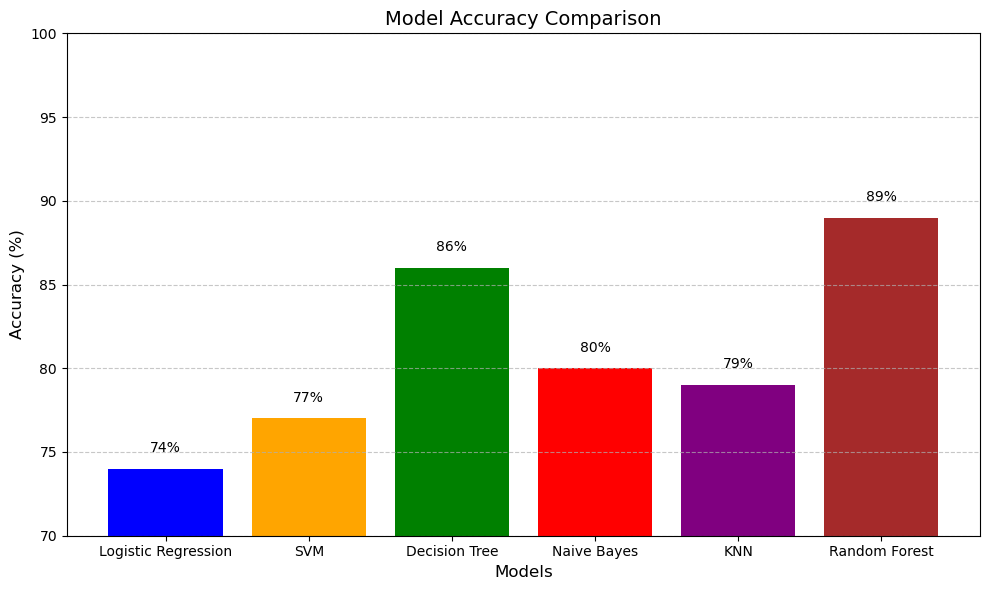

In [19]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN', 'Random Forest']
accuracies = [74, 77, 86, 80, 79, 89]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(70, 100)  # Set y-axis range to focus on accuracy differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc}%', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


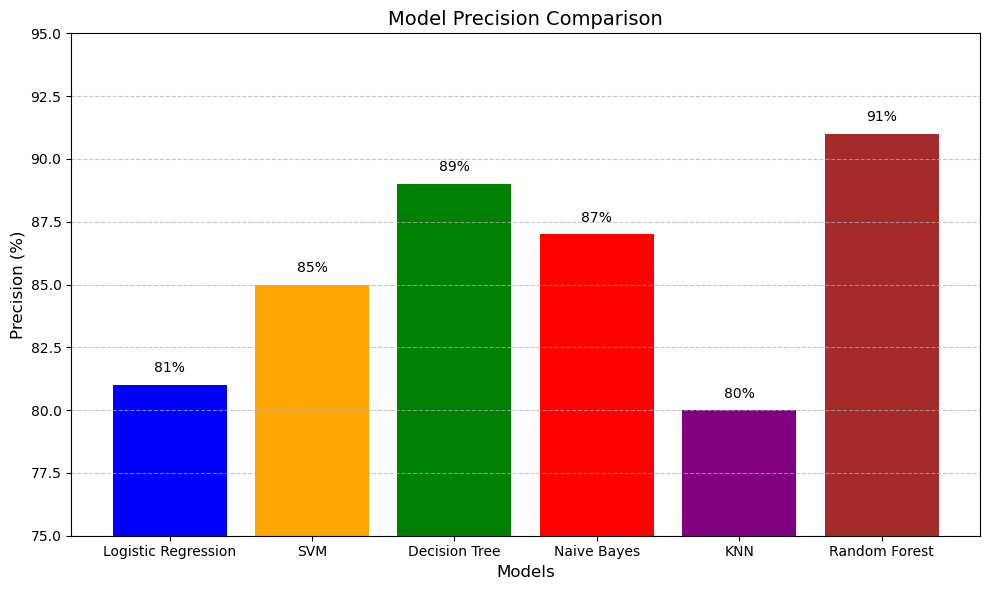

In [22]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN', 'Random Forest']
precisions = [81, 85, 89, 87, 80, 91]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Model Precision Comparison', fontsize=14)
plt.ylim(75, 95)  # Set y-axis range to focus on precision differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate precision values on top of the bars
for i, prec in enumerate(precisions):
    plt.text(i, prec + 0.5, f'{prec}%', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


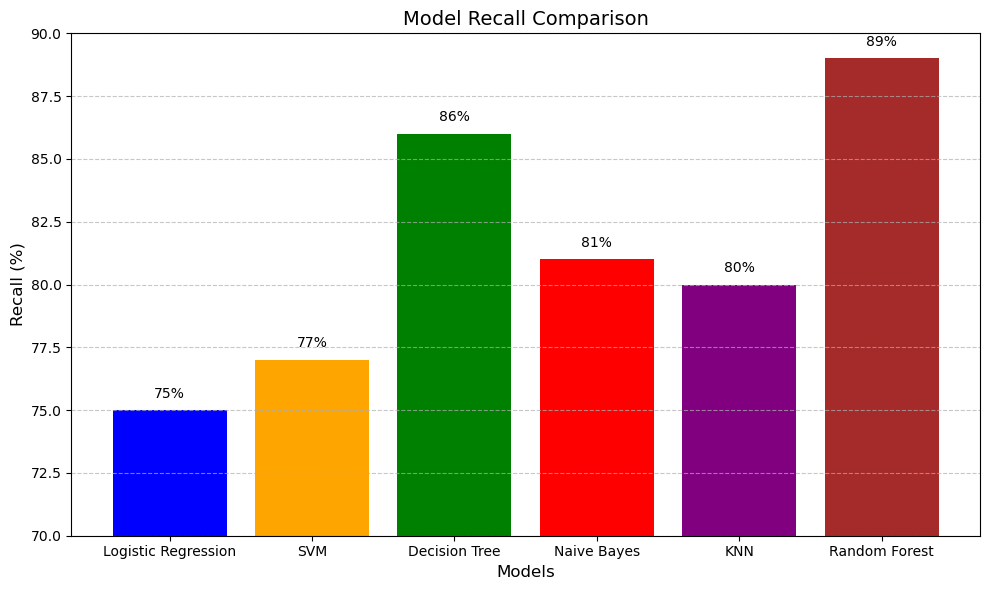

In [23]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN', 'Random Forest']
recalls = [75, 77, 86, 81, 80, 89]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Recall (%)', fontsize=12)
plt.title('Model Recall Comparison', fontsize=14)
plt.ylim(70, 90)  # Set y-axis range to focus on recall differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate recall values on top of the bars
for i, rec in enumerate(recalls):
    plt.text(i, rec + 0.5, f'{rec}%', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


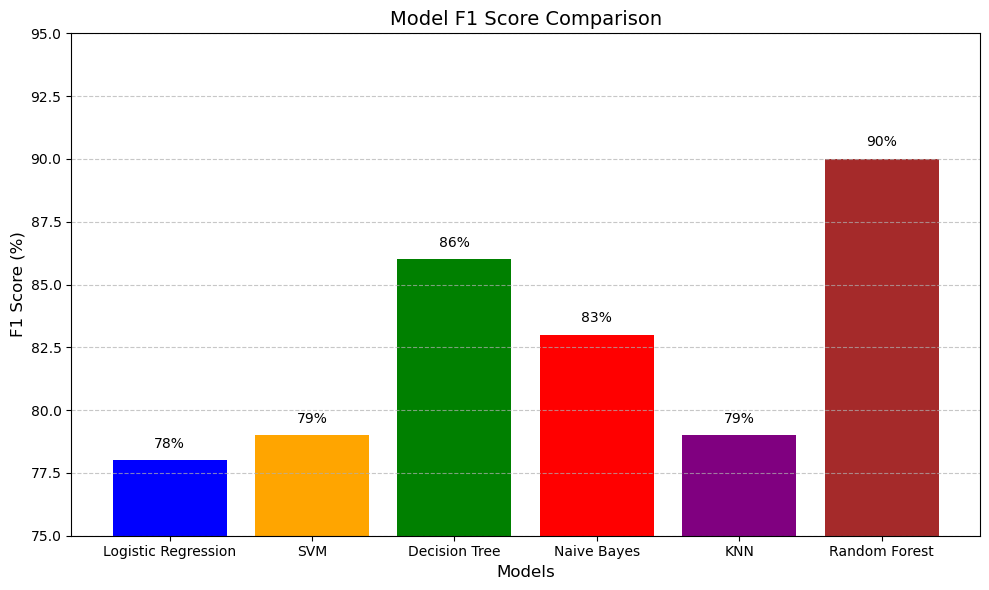

In [24]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN', 'Random Forest']
f1_scores = [78, 79, 86, 83, 79, 90]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Score (%)', fontsize=12)
plt.title('Model F1 Score Comparison', fontsize=14)
plt.ylim(75, 95)  # Set y-axis range to focus on F1 score differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate F1 scores on top of the bars
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.5, f'{f1}%', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# Model Prediction

In [90]:
test={'attack_neptune':1, 'attack_normal':0, 'attack_satan':0, 'count':229,
       'dst_host_diff_srv_rate':0.06, 'dst_host_same_src_port_rate':0.00,
       'dst_host_same_srv_rate':0.04, 'dst_host_srv_count':10, 'flag_S0':0, 'flag_SF':0,
       'last_flag':21, 'logged_in':0, 'same_srv_rate':0.04, 'serror_rate':0.00,
       'service_http':0}

In [91]:
data=pd.DataFrame([test])
data

,attack_neptune,attack_normal,attack_satan,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,flag_S0,flag_SF,last_flag,logged_in,same_srv_rate,serror_rate,service_http
0,1,0,0,229,0.06,0.0,0.04,10,0,0,21,0,0.04,0.0,0


In [92]:
result=model.predict(data)

In [93]:
print(result)

[1.]


## Means that the attack class belongs to Dos for the given data